rotate X0.. 
rotate X0.. 
start next threshold
start next threshold
Found Solution!!!
start next threshold
rotate X0.. 
rotate X0.. 
rotate Z0..
rotate Z0..
start next threshold
start next threshold
Found Solution!!!
start next threshold
rotate Z0..
rotate Z0..


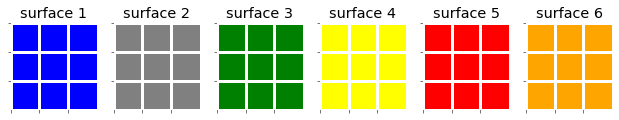

In [1]:
#ui+rubrick ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random
from copy import deepcopy
import json
import time

plt.style.use('ggplot')

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis):
    surface = deepcopy(surface)
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],3)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d

        surface['5'] = clockwise(surface['5'],3)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],3)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],3)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = counter_clockwise(surface['6'],3)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],3)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = counter_clockwise(surface['4'],3)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],3)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],3)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['2'] = clockwise(surface['2'],3)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),3)
        surface['5'][2] = a
        surface['2'][:,0] = np.flip(b)
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],3)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),3)
        surface['5'][1] = a
        surface['2'][:,1] = np.flip(b)
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),3)
        surface['5'][0] = a
        surface['2'][:,2] = np.flip(b)
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = clockwise(surface['3'],3)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['blue','gray','green','yellow','red','orange'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()
    
def BX0():
    global start_surface
    print('rotate X0.. ')
    start_surface = rotate(start_surface,'x0')
    
    l['text'] = 'Finish!'

    updateUi_surface(start_surface)

def BX1():
    global start_surface
    print('rotate X1..')
    start_surface = rotate(start_surface,'x1')
    updateUi_surface(start_surface)
       
def BX2():
    global start_surface
    print('rotate X2..')
    start_surface = rotate(start_surface,'x2')
    updateUi_surface(start_surface)
     
def BY0():
    global start_surface
    print('rotate Y0..')
    start_surface = rotate(start_surface,'y0')
    updateUi_surface(start_surface)
     
def BY1():
    global start_surface
    print('rotate Y1..')
    start_surface = rotate(start_surface,'y1')
    updateUi_surface(start_surface)
    
def BY2():
    global start_surface
    print('rotate Y2..')
    start_surface = rotate(start_surface,'y2')
    updateUi_surface(start_surface)
    
def BZ0():
    global start_surface
    print('rotate Z0..')
    start_surface = rotate(start_surface,'z0')
    updateUi_surface(start_surface)
    
def BZ1():
    global start_surface
    print('rotate Z1..')
    start_surface = rotate(start_surface,'z1')
    updateUi_surface(start_surface)
    
def BZ2():
    global start_surface
    print('rotate Z2..')
    start_surface = rotate(start_surface,'z2')
    updateUi_surface(start_surface)
        
def SOLVE():
    global start_surface
    
    #init
    current_surface = {'path': 'st','surface':start_surface}
    nodes_expand = unit_expand('st')
    m = 'st'
    mv = find_cost(goal_surface,current_surface['surface'])
    v = mv
    lenge = 0
    kk = 1
    xm = ''
    x = ''
    threshold = 1
    updateUi_surface(current_surface['surface'])
    next_threshold = 1
    found = False

    #loop
    while True:
        if found == True:        
            break
        if v == 0:
            print('Found Solution!!!')
            found = True        
        if len(xm) == 2:
            print('start next threshold')
            threshold = next_threshold
            xm = ''

        if m == '' and current_surface['path'] != 'st':
            sta = 'up'
            nodes_expand = unit_expand(xm[:-2*kk])
            if -2*kk+2 != 0:
                m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm[:-2*kk+2],next_threshold)
            else:
                m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
            if m == '':
                kk += 1
            else:
                kk = 1        
        else:
            sta = 'down'
            xm = m
            x = xm + '\t f-cost : ' + str(mv) + ' ( g:'+str(v) + ' h:'+str(lenge) + ')'+'\tThreshold: ' + str(threshold)+'\tNext Threshold: '+str(next_threshold)
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,'',next_threshold)
            
        nodes_expand_msg = ''
        for i in nodes_expand.keys():
            nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'


        current_surface = update_current_surface(xm)

    #-----------------------------------------------------
    #choose one for turn on or off graphic
    #     updateUi_surface(current_surface['surface'])
        line.draw()
    #------------------------------------------------------

        msg = x
        msg += '\n\n'+'-'*40+sta+str(kk)+'-'*40
        msg += '\n'+nodes_expand_msg
        msg += '\nmin&<threshold&neverexpand: ' + m + '\t f-cost : ' + str(mv) + ' ( g:'+str(v) + ' h:'+str(lenge)+' )'
        msg += '\nnext path : ' + current_surface['path']

        l['text'] = msg

        nodes_expand = unit_expand(current_surface['path'])

    #     time.sleep(1)



    
def RANDOM():
    global start_surface
    print('Random surface..')
    start_surface = rotate(start_surface,'x0')
    start_surface = rotate(start_surface,'x0')
    start_surface = rotate(start_surface,'x0')
    start_surface = rotate(start_surface,'y1')
    start_surface = rotate(start_surface,'y1')
    start_surface = rotate(start_surface,'y1')
    start_surface = rotate(start_surface,'z2')
    start_surface = rotate(start_surface,'z2')
    start_surface = rotate(start_surface,'z2')

#     l = ['x0','x1','x2','y0','y1','y2']
#     for i in range(100):
#         start_surface = rotate(start_surface,random.choice(l))

    updateUi_surface(start_surface)

#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubrick")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.5)

right_frame2 = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame2.place(relx=0.3, rely=0.5, relwidth=0.65, relheight=0.5)


#text
l = tk.Label(right_frame2, text = "Fact of the Day\nreusfdhgidf",justify=tk.LEFT)
# l.config(font =("Courier", 14))
l.place(rely=(0.1 + 0.1*0.01) ,relheight=1, relwidth=1)
l.pack(side=tk.LEFT, fill=tk.BOTH,expand=1)     
        
#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.10
BX0 = tk.Button(left_frame,text="X0",command = BX0)
BX0.place(relheight=RH, relwidth=1)
BX1 = tk.Button(left_frame,text="X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BX2 = tk.Button(left_frame,text="X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY0 = tk.Button(left_frame,text="Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY1 = tk.Button(left_frame,text="Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY2 = tk.Button(left_frame,text="Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ0 = tk.Button(left_frame,text="Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ1 = tk.Button(left_frame,text="Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ2 = tk.Button(left_frame,text="Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
SOLVE = tk.Button(left_frame,text="Solve",command = SOLVE)
SOLVE.place(rely= 9*(0.1 + RH*0.01) ,relheight=RH, relwidth=0.5)
RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01), relx=0.5,relheight=RH, relwidth=0.5)

#----------------------------------------------------------------------------------------------------
#init
    
goal_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

updateUi_surface(start_surface)

#------------------------------------------------------------------------------------

def find_cost(goal_surface,surface):
    surface = deepcopy(surface)
    def surfaceToOneArray(surface):
        x = np.array([])
        for i in range(1,7):
            x = np.append(x,surface[str(i)])
        return x
    def count_zeros(x):
        count = 0
        for i in x:
            if i == 0:
                count += 1
        return count

    goal_array = surfaceToOneArray(goal_surface)
    start_array = surfaceToOneArray(surface)
        
    x = np.subtract(goal_array, start_array) 

    return 54-count_zeros(x)

def update_current_surface(path):
    p = [path[i:i+2] for i in range(0, len(path), 2)]
    sf = start_surface
    for  i in p:
        sf = rotate(sf,i)
        
    s = { 'path':path, 'surface':sf}
    return s
    
def unit_expand(node):

    if not 'st' in node and node != '' and node != None:
        node = 'st'+node
    
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        e.update({node+i:{'cost':cost + lenge,'lenge':lenge,'value':cost}})
        
    return e

def find_min_that_more_threshold(node,threshold,everexplane,next_threshold):
    nod = deepcopy(node)
    m = ''
    mv = 99999
    v = ''
    l = ''
    
    Z = nod.keys()
    if everexplane != '':
        u = unit_expand(everexplane[:-2])
        Z = []
        for i in u.keys():
            if everexplane != 'st' and i != everexplane:
                if u[i]['cost'] > u[everexplane]['cost']:
                    Z.append(i)
                if u[i]['cost'] == u[everexplane]['cost'] and min([i[-2:],everexplane[-2:]]) == everexplane[-2:]:
                    Z.append(i)
            
    for i in Z:
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv :
            m = i
            mv = nod[i]['cost']
            v = nod[i]['value']
            l = nod[i]['lenge']
        if m == '':
            for i in nod.keys():
                if nod[i]['cost'] >= threshold:
                    if next_threshold == threshold:
                        next_threshold = nod[i]['cost']
                    if nod[i]['cost'] < next_threshold and nod[i]['cost'] > threshold:
                        next_threshold = nod[i]['cost']
  
    return m,mv,v,l,next_threshold


root.mainloop()